Quantum Chemistry in Python
===============

In this lesson we will explore how to perform Quantum Chemistry computations from Python, as well as several data science applications within the field of quantum chemistry.  To do this, we will utilize the quantum chemistry package Psi4, which has a Python front end and API, as well as several Python libraries for data analysis, visualization, and machine learning. 

## Quantum Chemistry Basics

In [1]:
# ==> Import libraries <==
import psi4                               # Quantum chemistry package 
import numpy as np                        # Numerical operations
import pandas as pd                       # Data handling
import matplotlib.pyplot as plt           # Plotting & visualization
from utilities.plotting import sapt_bars  # Custom library for fancy plotting

%matplotlib inline

In [25]:
# ==> Example 1: Construct He...He Potential Curve <==

# Define atomic coordinates for He dimer
He_dimer = """
0 1
He 0 0 0    # First He at the origin
--
He 0 0 {}   # Other He displaced along z-axis

units angstrom
"""

psivariables = {}

# Iterate over He...He separation distances in z axis
for r in np.arange(2.6, 10, 0.1):
    mol = psi4.geometry(He_dimer.format(r))                      # Create Psi4 molecule with displaced He dimer
    ie = psi4.energy('b3lyp-d3mbj/aug-cc-pvdz', bsse_type='cp')  # Compute CP-corrected interaction energy
    psivariables[r] = psi4.core.variables()                      # Save Psi4 internal variables

b3lypdf = pd.DataFrame(data=psivariables).T # Store Psi4 internal variables inside Pandas DataFrame
b3lypdf *= psi4.constants.hartree2kcalmol   # Convert energy units from atomic units (Hartree) to kcal/mol
b3lypdf.to_pickle('data/He2-b3lyp-d3mbj-curve.pkl')

Text(0, 0.5, 'Interaction Energy (kcal/mol)')

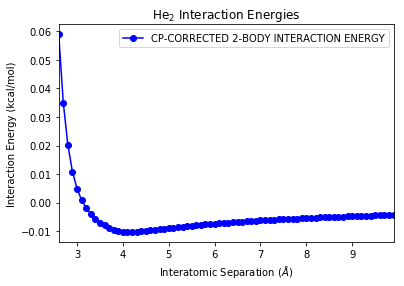

In [23]:
# ==> Plot IE curve directly from Pandas <==
plot_options = {'style': 'bo-',
                'title': 'He$_2$ Interaction Energies',
                'legend': True
               }

b3lypdf['CP-CORRECTED 2-BODY INTERACTION ENERGY'].plot(**plot_options)
plt.xlabel('Interatomic Separation ($\AA$)')
plt.ylabel('Interaction Energy (kcal/mol)')

## Predicting Binding Energies Drectly with Machine Learning

here you go derek you thirsty boy

## Improving QC Model Accuracy using Transfer Learning

### Symmetry-Adapted Perturbation Theory: Physically Motivated Interaction Energies from First Principles

Symmetry-Adapted Perturbation Theory (SAPT) can provide a more chemically intuitive description of intermolecular interaction energies by providing a breakdown of the IE into phisically meaningful components:

$$ IE_{\rm SAPT0} = E_{\rm elst} + E_{\rm exch} + E_{\rm ind} + E_{\rm disp} $$

To illustrate this method, we can visualize the total IE and components of our Helium dimer using SAPT:

In [26]:
# ==> SAPT IE & Components for He2 <==

for r in np.arange(2.6, 10, 0.1):
    mol = psi4.geometry(He_dimer.format(r))                      # Create Psi4 molecule with displaced He dimer
    ie = psi4.energy('sapt0/jun-cc-pvdz', molecule=mol)
    psivariables[r] = psi4.core.variables()                      # Save Psi4 internal variables

saptdf = pd.DataFrame(data=psivariables).T # Store Psi4 internal variables inside Pandas DataFrame
saptdf *= psi4.constants.hartree2kcalmol   # Convert energy units from atomic units (Hartree) to kcal/mol
saptdf.to_pickle('data/He2-sapt0-curve.pkl')

Text(0.5, 1.0, 'SAPT0 vs. B3LYP-D3M(BJ) IE')

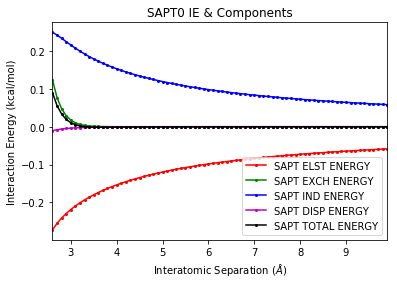

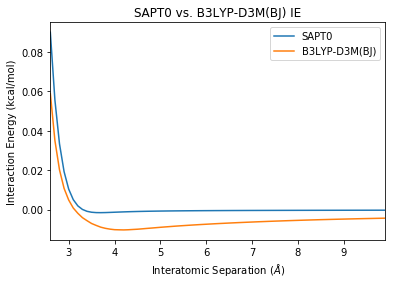

In [47]:
# ==> Visualize the components of SAPT along potential scan <==

terms = {'SAPT ELST ENERGY': 'ro-',
         'SAPT EXCH ENERGY': 'go-',
         'SAPT IND ENERGY': 'bo-',
         'SAPT DISP ENERGY': 'mo-',
         'SAPT TOTAL ENERGY': 'ko-'
        }

saptdf[terms.keys()].plot(style=list(terms.values()), markersize=2)
plt.xlabel('Interatomic Separation ($\AA$)')
plt.ylabel('Interaction Energy (kcal/mol)')
plt.title('SAPT0 IE & Components')

# Plot SAPT IE vs. B3LYP-D3M(BJ) IE
df = pd.concat([saptdf['SAPT TOTAL ENERGY'], b3lypdf['CP-CORRECTED 2-BODY INTERACTION ENERGY']], axis=1)
df.columns = ['SAPT0', 'B3LYP-D3M(BJ)']
df.plot()
plt.xlabel('Interatomic Separation ($\AA$)')
plt.ylabel('Interaction Energy (kcal/mol)')
plt.title('SAPT0 vs. B3LYP-D3M(BJ) IE')

### SAPT--D: A More Efficient SAPT Approach

### SAPT--D(ML): Transfer Learning SAPT--D towards "Gold Standard"